## WCRW - Applied Machine Learning 2nd Assignment
### Fall Semester 2019-2020
***
> Nikolaos Fragkomanolis AM: 8160142 <br />
> Athens University of Economics and Business 29/11/2019 <br />

At first, we import the necessary libs in order to examine our data and produce the results needed. After producing a sample of the data, we see that it's impossible to read all the columns of the dataframe. For this reason we visit the [documentation](https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf) of the research and read the description of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.formula.api import logit

%matplotlib inline

In [2]:
data_filename = 'WCRWreplication.dta'
data = pd.read_stata(data_filename)
data.sample(2)

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
162,0.0,3,NaN,1964,1963,Rwanda,Watusi,Hutu regime,517.0,517.0,...,4.309456,0.18,-5.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0
91,0.0,3,40000.0,1949,1944,Greece,Greek communists,British and US occupation,350.0,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## Question 1
***
### The first question provides:
- a **plot** that shows the **frequency** of nonviolent and violent campaigns during the 20th century

We extract the columns we need in order to create our plot. <br />

**Note**: 
- _'t1, t2..'_ columns contain a dichotomous variable (0/1) whether the campaign occured during the 1st, 2nd, .. etc. decade of the 20th century <br />
- A campaign belongs to a `t` decade based on the year the campaign ended. For example a campaign that ended on 1919 belongs to the `t2` decade (1910-1919).

In [3]:
viol_nonviol = data[["location", "campaign", "eyear", 
                     "viol", "nonviol", "success", 
                     "t1", "t2", "t3", "t4", "t5", 
                     "t6", "t7", "t8", "t9", "t10", "t11"]]
viol_nonviol.head()

,location,campaign,eyear,viol,nonviol,success,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
0,Cuba,Cuban Revolution,1959,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Haiti,Caco Revolt,1920,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Haiti,,1985,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Dominican Republic,Dominican insurgency,1924,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dominican Republic,leftists,1965,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In order to **separate the violent from the nonviolent** campaigns we select the records whose `viol` column is equal to 1. The _viol_ dataframe now contains all the violent campaigns. We create a view of our data sorted by end year in order to take a look at the frequency the first years of the 20th century.

In [4]:
viol = viol_nonviol.loc[viol_nonviol.viol == 1]
viol.sort_values(by='eyear').head()

,location,campaign,eyear,viol,nonviol,success,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
306,Philippines,Filipino nationalists,1902,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,South Africa,Boer separatists,1902,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,Ottoman Empire,VMRO Rebels (Macedonians) in Ilinden uprising,1903,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,Venezuela,La Revolución Libertador,1903,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Bolivia,Acre rebellion,1903,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Afterwards, we need to find the total number of violent campaigns that occured in each decade. In order to select only the columns that are related to the decades and avoid writing 11 times the same command, we use the `.filter(regex)` command which selects the data we need based on the regex given. <br />
The sum of each column gives us the **frequency of violent campaigns for each decade**.

In [5]:
viol_decades = viol.filter(regex=("t.*"))
del viol_decades['location']
v_freq = pd.DataFrame(viol_decades.sum(axis=0).astype(int), columns = ['Violent'])
v_freq

,Violent
t1,14
t2,8
t3,18
t4,14
t5,21
t6,19
t7,17
t8,26
t9,13
t10,45


We follow exactly the same path to find the **frequency of nonviolent campaigns for each decade**.

In [6]:
nonviol = viol_nonviol.loc[viol_nonviol.nonviol == 1]
nonviol.sort_values(by='eyear').head(10)

,location,campaign,eyear,viol,nonviol,success,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
254,China,May the Fourth Movement,1919,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,Germany,Ruhrkampf resistance,1923,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,Chile,,1931,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,Denmark,,1944,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
120,Norway,,1944,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Guatemala,October Revolutionaries,1944,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,El Salvador,Strike of Fallen Arms,1944,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
271,India,,1945,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,Nigeria,Independence Movement,1950,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
63,East Germany,,1953,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


`filter(regex)` again in order to calculate the frequency.

In [7]:
nonviol_decades = nonviol.filter(regex='t.*')
del nonviol_decades['location']
nonv_freq = pd.DataFrame(nonviol_decades.sum(axis=0).astype(int), columns = ['Nonviolent'])
nonv_freq

,Nonviolent
t1,0
t2,1
t3,1
t4,1
t5,5
t6,9
t7,7
t8,7
t9,32
t10,23


It's easier to compare the results to each other if we have a single dataframe that shows clearly the violent and nonviolent campaigns for each decade. Thus, we merge the two dataframes, that resulted from the calculations we did, based on their index. We also rename the index in order to better understand with which decade every frequency is associated.

In [8]:
vnonv_freq = v_freq.merge(nonv_freq, left_index=True, right_index=True)
vnonv_freq.rename(index = {"t1":'1900', "t2":'1910', "t3":'1920', "t4":'1930', "t5":'1940',
                           "t6":'1950', "t7":'1960', "t8":"1970", "t9":'1980', "t10":'1990',
                           "t11":'2000'}, inplace=True)
vnonv_freq

,Violent,Nonviolent
1900,14,0
1910,8,1
1920,18,1
1930,14,1
1940,21,5
1950,19,9
1960,17,7
1970,26,7
1980,13,32
1990,45,23


It's time to create our **plot** and show the frequency of violent and nonviolent campaigns for each decade during the 20th century. The results we plot are stacked.

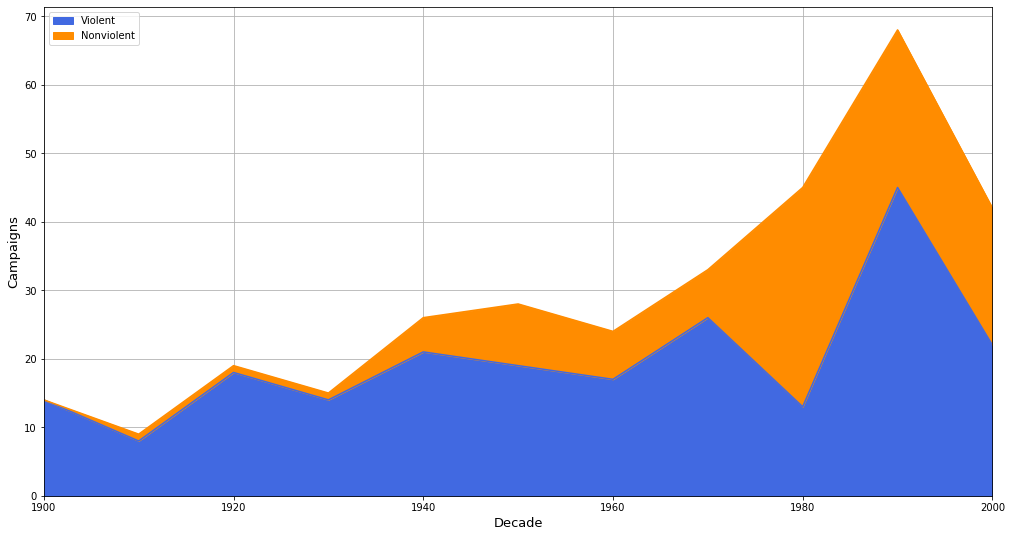

In [9]:
fig, ax = plt.subplots()
vnonv_freq.plot.area(ax=ax, color=['royalblue', 'darkorange'], figsize=(17,9))
ax.set_xlabel('Decade', size=13)
ax.set_ylabel('Campaigns', size=13)
ax.grid()
ax.set_axisbelow(True)

### Peak in the 90's
As far as we can see from the plot, in the 90's there is a phenomenal augmentation, which has no other comparable to another during the rest of the 20th century. This period is characterized by many cultural alterations, such as the boost of multicultural societies and the insertion of alternative media in people's life due to technology's advance. Other than that, the collapse of the Soviet Union and the attenuation of communism accross the world, the political shift to mostly right-wing politics leaded to a more scepticistic attitude over the governances, more campaigns supporting people's right and humanitarian issues. The people started to redetermine and reeastablish the economic and political ascendancy globally.

## Question 2
***
### The second question presents:
- a plot, for each decade from 1940 onwards, that shows the number of nonviolent campaigns and the percentage of success.

We use the `nonviol` dataframe we created before that contains the nonviolent campaigns, in order to extract those that occured after 1940 (including 1940) and were succesful. <br />

**Note:** 
Column `success` contains 0 if a campaign failed, or 1 if it succeded.

In [10]:
nonv_dec40_suc = nonviol[(nonviol.eyear > 1939) & (nonviol.success == 1)]
nonv_dec40_suc.head()

,location,campaign,eyear,viol,nonviol,success,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
2,Haiti,,1985,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,Mexico,,2000,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,Guatemala,October Revolutionaries,1944,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,El Salvador,Strike of Fallen Arms,1944,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Venezuela,,1958,0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


The useful `.filter(regex)` method this time gives us the number of succcesful campaigns for each decade.

In [11]:
nonv_suc = nonv_dec40_suc.filter(regex='t.*')
del nonv_suc['location']
nonv_suc = pd.DataFrame(nonv_suc.sum(axis=0).astype(int), columns=['Sucful_camps'])
nonv_dec40_sucful = nonv_suc.loc['t5':'t11']
nonv_dec40_sucful

,Sucful_camps
t5,2
t6,3
t7,3
t8,4
t9,17
t10,12
t11,14


This time we are interested in the decades from `t5` onwards.

We extract the total number of campaigns for each decade that occured from 1940.

In [12]:
nonv_dec40_freq = nonv_freq.loc['t5':]
nonv_dec40_freq

,Nonviolent
t5,5
t6,9
t7,7
t8,7
t9,32
t10,23
t11,20


Dividing the number of succesful campaigns to the total number of campaigns we get the percentage of success

In [13]:
nonv_dec40_freq.loc[:,'NVSuccess_rate'] = (nonv_dec40_sucful.loc[:, 'Sucful_camps'].\
                                     div(nonv_dec40_freq.loc[:, 'Nonviolent'])).round(2)
nonv_dec40_freq.rename(index = {"t5":'1940', "t6":'1950', "t7":'1960', "t8":"1970",
                               "t9":'1980', "t10":'1990', "t11":'2000'},inplace=True)
nonv_dec40_freq

C:\Users\nicko\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nicko\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\nicko\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

,Nonviolent,NVSuccess_rate
1940,5,0.40
1950,9,0.33
1960,7,0.43
1970,7,0.57
1980,32,0.53
1990,23,0.52
2000,20,0.70


Then, we create our bar plot, which presents:
- the decades in the **x axis**
- the number of campaigns that occured in the **left y axis**
- and the success rate in the **right y axis**

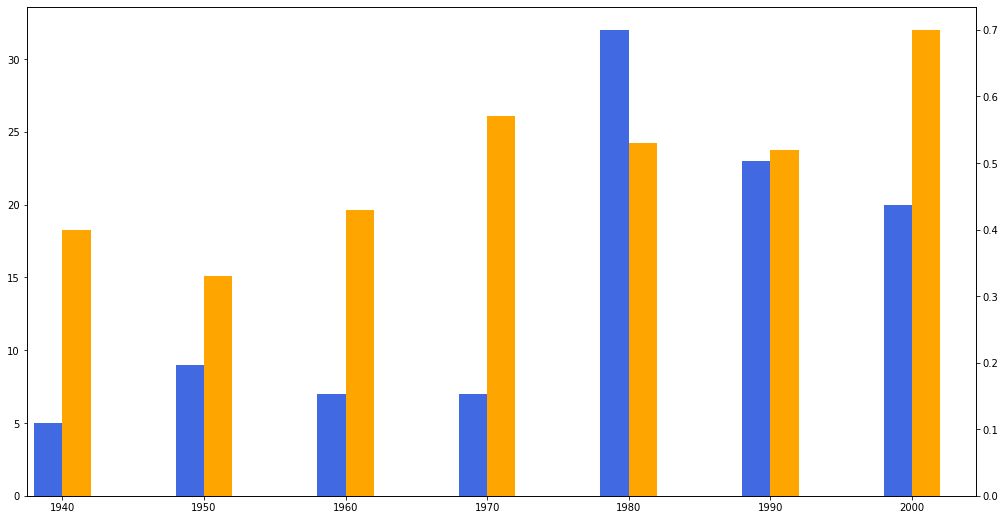

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax1 = ax.twinx()
nonv_dec40_freq.Nonviolent.plot(kind='bar', color='royalblue', ax=ax, rot=0, position=1, width=0.2, figsize=(17,9))
nonv_dec40_freq.NVSuccess_rate.plot(kind='bar', color='orange', ax=ax1, rot=0, position=0, width=0.2, figsize=(17,9))
plt.show()

## Question 3
***
### The third question presents:
- a plot that shows the success rate for violent and nonviolent campaigns by decade

We have already extracted the results needed for the nonviolent campaigns from the previous question. So, we need to do the same for the violent results. For this reason, we use the `viol` dataframe from Question 1 that contains all the violent campaigns and we select those that occured after 1939 and were succesful.

In [15]:
viol_dec40_suc = viol[(viol.eyear > 1939) & (viol.success == 1)]
viol_dec40_suc.sample(5)

,location,campaign,eyear,viol,nonviol,success,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
299,Cambodia,Khmer Rouge,1975,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
239,Yemen,"FLOSY, NLF in Aden",1967,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
170,Ethiopia,Tigrean Liberation Front,1991,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196,Algeria,Algerian Revolt/National Liberation Front,1962,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,Cuba,Cuban Revolution,1959,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Again, we calculate the number of succesful violent campaigns in order to later calculate the success rate.

In [16]:
v_suc = viol_dec40_suc.filter(regex="t.*")
del v_suc['location']
v_suc = pd.DataFrame(v_suc.sum(axis=0).astype(int), columns=['sucful_camps'])
v_sucful = v_suc.loc['t5':]
v_sucful

,sucful_camps
t5,7
t6,7
t7,4
t8,10
t9,5
t10,12
t11,3


We are interested in the decades from 1940 onwards.

In [17]:
v_dec40_freq = v_freq.loc['t5':]
v_dec40_freq

,Violent
t5,21
t6,19
t7,17
t8,26
t9,13
t10,45
t11,22


We do the necessary divisions to find the **success rate** and we create a new column in `v_dec40_freq` (that already contains the total number of violent campaigns from 1940) that expresses the success rate.

In [18]:
v_dec40_freq.loc[:, 'Vsuccess_rate'] = (v_sucful.loc[:, 'sucful_camps'].\
                                        div(v_dec40_freq.loc[:, 'Violent'])).round(2)
v_dec40_freq.rename(index = {"t5":'1940', "t6":'1950', "t7":'1960', "t8":"1970",
                             "t9":'1980', "t10":'1990', "t11":'2000'},inplace=True)
v_dec40_freq

,Violent,Vsuccess_rate
1940,21,0.33
1950,19,0.37
1960,17,0.24
1970,26,0.38
1980,13,0.38
1990,45,0.27
2000,22,0.14


We create a single dataframe that contains only two columns for the success rate, one for the nonviolent and one for the violent campaigns.

In [19]:
vnonv_sucrate = pd.DataFrame({"nonviolent": nonv_dec40_freq['NVSuccess_rate'], 
                              "violent": v_dec40_freq['Vsuccess_rate']})
vnonv_sucrate

,nonviolent,violent
1940,0.40,0.33
1950,0.33,0.37
1960,0.43,0.24
1970,0.57,0.38
1980,0.53,0.38
1990,0.52,0.27
2000,0.70,0.14


Now, we create the plot that contains the decades in the x axis and the success rate for each type of campaign (violent or nonviolent) in the y axis.

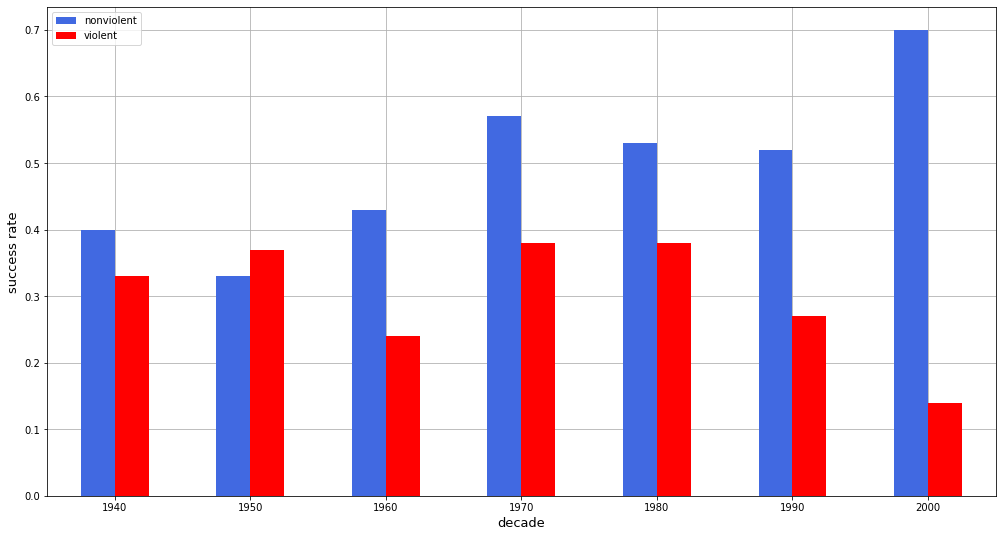

In [20]:
fig, ax = plt.subplots()
vnonv_sucrate.plot(kind='bar', ax=ax, color=['royalblue', 'red'], rot=0, figsize=(17,9))
ax.set_xlabel('decade', size=13)
ax.set_ylabel('success rate', size=13)
ax.grid()
ax.set_axisbelow(True)

As Erical Chenoweth and Maria J. Stephan correctly mention in the documentation:

> _"the results are even more favorable to nonviolent campaigns than to violent campaigns"_

And the plot is the proof that nonviolent campaigns have a higher success rate !

## Question 4
***
### The fourth question:
- includes the 25 largest campaigns for all years based on their number of members that participated at highest point

We create a new dataframe that contain the membership at highest point, the start and end year, the location, the objective, whether it was violent or not and whether it was succesful or not.

**Note:**
- we transform the `viol` and `success` column in order to better understand the data (_nonviolent_ instead of _0_, etc.)

In [21]:
peakmemb = data[['peakmembership',
                 'byear',
                 'eyear',
                 'location',
                 'target',
                 'viol',
                 'success']].sort_values(by = 'peakmembership', ascending=False).head(25)
peakmemb.reset_index(drop=True, inplace=True)
peakmemb.loc[:, 'viol'] = peakmemb.viol.replace([1, 0], ['violent', 'nonviolent'])
peakmemb.loc[:, 'success'] = peakmemb.success.replace([0,1], ['succesful', 'non-succesful'])

In [22]:
peakmemb

,peakmembership,byear,eyear,location,target,viol,success
0,4500000.0,1937,1945,China,Japanese occupation,violent,succesful
1,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,nonviolent,non-succesful
2,2000000.0,1986,1983,Philippines,Ferdinand Marcos,nonviolent,non-succesful
3,1000000.0,1988,1988,Burma,military junta,nonviolent,succesful
4,1000000.0,1989,1989,China,Communist regime,nonviolent,succesful
5,1000000.0,1967,1968,China,anti-Maoists,violent,succesful
6,1000000.0,1922,1949,China,Kuomintang regime,violent,non-succesful
7,1000000.0,2006,2006,Mexico,Calderon regime,nonviolent,succesful
8,1000000.0,2005,2005,Lebanon,Syrian forces,nonviolent,non-succesful
9,1000000.0,1993,1999,Nigeria,Military rule,nonviolent,non-succesful


### Karamanlis Regime, Greece 1963
After 8 years of governance, in 1963 the Prime Minister Konstantinos Karamanlis submits his resignation due to strong arguments with king Pavlos. The whole political story begins in 1961 when Greece faces a strong political crisis due to the doubts that a big part of the citizens and politicians had about the reliability of the outcome in the elections of October 1961. It is true that external coordinates such as the army and the king affected the people in favor of Karamanlis' Regime in order to direct the outcome of the elections. This conspiracy theory was examined by the era's people and politicians and leaded to an unstable political situation in Greece. The relationship between king Pavlos and the prime minister started to break down. The "Central Union" (political party of the era) started pressing the king in order to force Karamanlis to quit. Except for the fact that the king was intentionally involved in this intrigue, the subject addressed constitutional issues which did not really leave the king any other choice, rather than apply pressure on the PM. Karamanlis was continuously charged even from the queen with having played such unethical political games. He eventually resigned from his political duties in 11 June 1963, which leaded to the campaign we are examining in this project.

Source: https://www.kathimerini.gr/853741/article/epikairothta/ellada/h-paraithsh-toy-kwn-karamanlh

## Question 5
***
### The fifth question contains:
- a logistic regression, examining the effect of participation on the probability of campaign success, taking also into consideration the location's population

We create a dataframe containing the data we are interested in, `success`, `lnpop`, `mempc` and `location`: 
- success: expresses a dichotomous variable which is 0 for non-succesful and 1 for succesful campaigns,
- lnpop: expresses the location's logged population the year the campaign ends
- mempc: expresses the membership per capita for each campaign
- location: we also select the column related to the campaign's location in order to have some information that differentiate the campaigns with each other, but it is not necessary for the regression

We, then, run the logistic regression that will give us the odds of success for each lnpop and mempc.

In [23]:
logreg_data = data[["location", "success", "lnpop", "mempc"]].dropna().\
              reset_index(drop=True)
suconmemb_mod = logit("success ~ mempc + lnpop", logreg_data).fit()
suconmemb_mod.params

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


Intercept   -5.819861
mempc        4.489174
lnpop        0.090722
dtype: float64

In [24]:
suconmemb_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  163
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1294
Time:                        21:18:24   Log-Likelihood:                -96.951
converged:                       True   LL-Null:                       -111.35
Covariance Type:            nonrobust   LLR p-value:                 5.551e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8199      1.921     -3.030      0.002      -9.584      -2.055
mempc          4.4892      0.986      4.554      0.000       2.557       6.421
lnpop          0.0907      0.129      0.706      0.480      -0.161       0.343
==============================================================================
"""

We are going to focus on the parameters that will help us understand the relationship between the dependent (success) and the independent (mempc, lnpop) variables:
-  **Intercept:** there is actually no reason to examine the _Intercept_ parameter as it is basically meaningful when the independent values are sometimes equal to 0, because it expresses the expected mean value of the dependent variable when all independent ones = 0. <br />
- **Pseudo R-squared:** the fact that pseudo R-squred is not that close to 1 indicates that the model does not describe the success of campaigns based on `mempc` and `lnpop` that succesfuly. There might be more factors that should be included in order to predict better.

- **coefficients (coef):** 
    - the coefficient for `mempc` indicates the estimated change in the natural log of the odds for the success of a campaign for each unit increase of a mempc value. For example, the 4.4892 coefficient shows that the natural log of the odds increases by 4.4892 for each additional member per capita. In order to explain further we can calculate the odds ratio for when the predictor (mempc) is x+1, compared to when the predictor is x, by exponentiating the coef of mempc: `e ^ (4.4892) = 89,05`. That is, each additional member per capita leads to a ~89 fold increase in the odds of success of a campaign. Due to the fact that this numbers seems a bit large we see that maybe we should have scaled the data in order to have more realistic results.
    - the coefficient for `lnpop` indicates the change to the odds of success if we increase the logged population by one unit. Furthermore, if the odds ratio for lnpop equals `e ^ (0.0907) = 1,09` then each additional unit in logged population gives a 1.09 increase to the odds of a campaign's success. 

- **P value:** 
    - the P value of `mempc` seems to be 0.000 but it is not actually equal to 0, but less than 0.001. However, this means that the result that mempc produced was very significant for our prediction and should not be rejected. In other words we should reject the null hypothesis (which means no relationship between the 2 variables), and admit that there is truly a relationship between the two variables. That also leads to the conclusion that the relationship between the members' participation and the success of a campaign is not due to chance.

Our scatter plot is ready to be visualized. The **y axis** shows the possibility the regression calculated, and the **x axis** shows the participants per capita logged.
***
Note: the `.predict()` method gives us the possibility we use in the y axis.

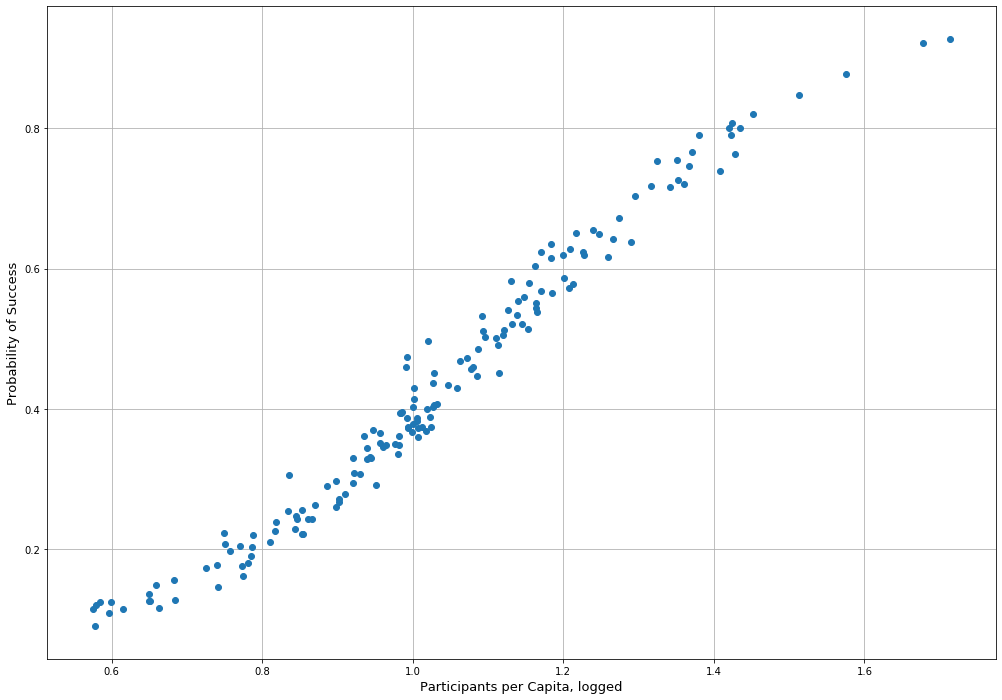

In [25]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(111)
x = logreg_data.mempc
y = suconmemb_mod.predict()
ax.scatter(x, y)
ax.set_xlabel("Participants per Capita, logged", size=13)
ax.set_ylabel("Probability of Success", size=13)
ax.grid()
ax.set_axisbelow(True)

## Question 6
***
### The sixth question contains:
- the proper calculation in order to find the percentage of the population that is the tipping point for success in a campaign

We add a column in the dataframe we extracted in question 6 named `success_proba` that expresses the probability we calculated using the logistic regression.

In [26]:
logreg_data['success_proba'] = suconmemb_mod.predict()
logreg_data.head()

,location,success,lnpop,mempc,success_proba
0,Cuba,1,8.819231,1.226839,0.619573
1,Haiti,1,8.585698,1.200712,0.586438
2,Mexico,1,11.499098,1.001202,0.429948
3,Guatemala,1,8.083094,0.741234,0.146914
4,Guatemala,0,9.317105,0.784924,0.189858


We are interested in the percentage of the population that is the tipping point for the success of a campaign. So, we extract the columns needed from the original dataframe `data`.

In [27]:
peakm = data[['location', 'lnpop', 'mempc']].\
        dropna().reset_index(drop=True)
peakm.tail()

,location,lnpop,mempc
158,Philippines,10.955847,1.324284
159,Philippines,11.286525,1.162657
160,Indonesia,12.379339,0.659205
161,Indonesia,12.268933,0.750704
162,Papua New Guinea,8.427487,0.901918


Note: There are no `NaN` values so the matching with the dataframe we used to do the logistic regression is in the same index with the values of this dataframe.

Whether a campaign is going to be succesful or not results from the principals of statistics. It is 50/50 for each case. So, the possibility of a campaign being succesful is every value over 0.5 (50%). Every value of this possibility (over 50%) that corresponds with the population gives us the percentages of the population needed for a campaign in order to be succesful.

In [28]:
possible_camps = logreg_data[logreg_data['success_proba'] > 0.50].reset_index(drop=True)
possible_camps.head()

,location,success,lnpop,mempc,success_proba
0,Cuba,1,8.819231,1.226839,0.619573
1,Haiti,1,8.585698,1.200712,0.586438
2,Nicaragua,0,8.161110,1.165337,0.537911
3,Venezuela,1,10.097724,1.208794,0.627783
4,Guyana,1,6.603117,1.289875,0.638685


We need to find the unlogged number of members that participated in each campaign. From the documentation, we find that `mempc = lmembers / lnpop`, so `lmembers = mempc * lnpop`. We use the `np.exp()` method in order to unlog the values of column `members`. <br />

Note:
- if we look at the original dataframe `data` we will see that `members` and `peakmembership` are equal to each other, so the calculation is correct.

In [29]:
possible_camps['members'] = np.exp(possible_camps['lnpop'] * possible_camps['mempc']).astype(int)
possible_camps.head()

,location,success,lnpop,mempc,success_proba,members
0,Cuba,1,8.819231,1.226839,0.619573,50000
1,Haiti,1,8.585698,1.200712,0.586438,29999
2,Nicaragua,0,8.161110,1.165337,0.537911,13499
3,Venezuela,1,10.097724,1.208794,0.627783,200000
4,Guyana,1,6.603117,1.289875,0.638685,4999


It is necessary to find the real location's population, but we only have the logged populations. We use the `np.exp()` method again to create the column `pop`.
***
Something very interesting here is that the result of this calculation gives a weirdly low number comparing it to the number of members that took part in each campaign. After searching for the countrys' [populations during the 20th century](https://www.populationpyramid.net/), I found that we need to multiply the result of this calculation with 1000 in order to have the actual population. The only country whose population gave an inaccurate number was France. The data we have give 11 millions for France's population, but the search engine gives a continuously augmenting number starting from 40 millions from 1950 onwards. We would consider France as an **outlier** but at this point we do not have any campaign that took place in France.

In [30]:
print("Number of records related to France:")
print(len(possible_camps[possible_camps.location=='France']))
possible_camps['pop'] = (1000 * (np.exp(possible_camps.lnpop))).astype(int)
possible_camps.head()

Number of records related to France:
0


,location,success,lnpop,mempc,success_proba,members,pop
0,Cuba,1,8.819231,1.226839,0.619573,50000,6763062
1,Haiti,1,8.585698,1.200712,0.586438,29999,5354530
2,Nicaragua,0,8.161110,1.165337,0.537911,13499,3502071
3,Venezuela,1,10.097724,1.208794,0.627783,200000,24287666
4,Guyana,1,6.603117,1.289875,0.638685,4999,737390


We join the two dataframes `possible_camps` and `peakm` in order to have a single dataframe for the results we have found. We set location, lnpop and mempc as index in order to match the records correctly.

In [31]:
possible_camps = (possible_camps.set_index(['location', 'lnpop', 'mempc']).\
            join(peakm.set_index(['location', 'lnpop', 'mempc']))).reset_index()
possible_camps.head()

,location,lnpop,mempc,success,success_proba,members,pop
0,Cuba,8.819231,1.226839,1,0.619573,50000,6763062
1,Haiti,8.585698,1.200712,1,0.586438,29999,5354530
2,Nicaragua,8.161110,1.165337,0,0.537911,13499,3502071
3,Venezuela,10.097724,1.208794,1,0.627783,200000,24287666
4,Guyana,6.603117,1.289875,1,0.638685,4999,737390


We are now ready to find the percentage of the population that participated in each succesful campaign. Thus we create column `pop_perc`.

In [32]:
possible_camps['pop_perc'] = possible_camps['members'].astype(int) / possible_camps['pop']
possible_camps.head()

,location,lnpop,mempc,success,success_proba,members,pop,pop_perc
0,Cuba,8.819231,1.226839,1,0.619573,50000,6763062,0.007393
1,Haiti,8.585698,1.200712,1,0.586438,29999,5354530,0.005603
2,Nicaragua,8.161110,1.165337,0,0.537911,13499,3502071,0.003855
3,Venezuela,10.097724,1.208794,1,0.627783,200000,24287666,0.008235
4,Guyana,6.603117,1.289875,1,0.638685,4999,737390,0.006779


The minimum percentage of column `pop_perc` is the answer to our question; the percentage of the population that is the tipping point for a campaign to succeed.
> Tipping point of population's percentage (%) for a succesful campaign:

In [38]:
print((possible_camps.pop_perc.min()* 100).round(2))

0.26


The percentage corresponds to a campaign with 60,000 members in Cambodia which numbers 22,874,694 citizens.

## Question 7
### The seventh question presents:
- A logistic regression in order to examine whether nonviolent resistance remains significant even if we control for the regime type.
- A logistic regression which examines whether nonviolent resistance remains significant even if we control for geographical location of the campaign.

### 1 
***
We extract the columns we need and run the logistic regression on `success` controlling for `nonviol` (whether the campaign was succesful or not), `tpolity` (core of campaign target (democracy –autocracy) 1 year before campaign ends), `lmembers` (log of peakmembership) and `lnpop` (location’s logged population the year the campaign ends).

In [34]:
logreg_nonviol_data = data[["location",
                            "success",
                            "nonviol",
                            "tpolity",
                            "lmembers", 
                            "lnpop"]].dropna().reset_index(drop=True)
suconNonviol_mod = logit('success ~ nonviol + tpolity + lmembers + lnpop', logreg_nonviol_data).fit()
suconNonviol_mod.params

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


Intercept   -0.108506
nonviol      0.904785
tpolity      0.051987
lmembers     0.375104
lnpop       -0.436323
dtype: float64

In this model analysis, if we focus on _p values_, we can see that `lmembers` and `lnpop` play the most significant role concerning the success of a campaign. We can also see that `tpolity` has the highest p value comparing it to the other predictors. That is, there are factors which seem to play a more important low in order to predict the success of a campaign, instead of POLITY IV score of the campaign's target. In this logistic regression model we can see that among the factors we included, the nonviolent does not seem to affect the campaign as much as the number of members ans the level of population.

In [35]:
suconNonviol_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  141
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            4
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1627
Time:                        21:18:25   Log-Likelihood:                -79.967
converged:                       True   LL-Null:                       -95.506
Covariance Type:            nonrobust   LLR p-value:                 2.953e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1085      1.413     -0.077      0.939      -2.878       2.661
nonviol        0.9048      0.464      1.952      0.051      -0.004       1.813
tpolity        0.0520      0.030      1.744      0.081      -0.006       0.110
lmembers       0.3751      0.128      2.926      0.003       0.124       0.626
lnpop         -0.4363      0.142     -3.067      0.002      -0.715      -0.157
==============================================================================
"""

### 2
***
We now examine whether nonviolent resistance remains significant even if we controlfor geographical location of the campaign through a logistic regression.

In [36]:
logreg_nonviol_loc_data = data[["lccode",
                            "success",
                            "nonviol",]].dropna().reset_index(drop=True)
suconNonviol_loc_mod = logit('success ~ nonviol + lccode',
                             logreg_nonviol_loc_data).fit()
suconNonviol_loc_mod.params

Optimization terminated successfully.
         Current function value: 0.603612
         Iterations 5


Intercept   -0.706077
nonviol      1.201901
lccode      -0.000753
dtype: float64

As far as we can see from the summary of the logistic regression, the Pseudo R-squared equals a very low number of ~0.065 which means that the model does not properly describe what we want to examine. The most significant factor that we can see is whether the campaign was violent or not (`nonviol`). We would say that the nonviolent factor now determines the outcome of a campaign.

In [37]:
suconNonviol_loc_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  323
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                 0.06476
Time:                        21:18:25   Log-Likelihood:                -194.97
converged:                       True   LL-Null:                       -208.47
Covariance Type:            nonrobust   LLR p-value:                 1.370e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7061      0.298     -2.372      0.018      -1.289      -0.123
nonviol        1.2019      0.251      4.790      0.000       0.710       1.694
lccode        -0.0008      0.001     -1.449      0.147      -0.002       0.000
==============================================================================
"""